In [1]:
#libraries
import pandas as pd
import os
import unicodedata
import warnings
warnings.filterwarnings('ignore')
import re
import string
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#path_datasets="D://G//PROIECTE//Understanding Digital Assets//Cod//Datasets//"
path_datasets="/Users/danielpele/Library/CloudStorage/GoogleDrive-danpele@ase.ro/Other \
computers/Asus/G/PROIECTE/Understanding Digital Assets/Cod/Datasets/"
df = pd.read_csv(path_datasets+"postari.csv", low_memory=False)

df['date']=pd.to_datetime(df['Page Created'])
# Convert the index of df to a DatetimeIndex
df.index = pd.to_datetime(df['date'], )

# Filter dates after 2012
df = df[df.index >= '2012-01-01']

# Convert the 'date' column to year-month periods
df['year'] = df.index.to_period('y')

In [3]:
pd.set_option('display.max_columns', None) 

df.head()

,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,sentiment_positive,sentiment_negative,sentiment_neutral,date,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-25 02:20:00,0,Cheat Codes ATL,cheatcodesatlanta,1.000000e+14,ORG_GENERAL,US,Cheat Codes is a media company that empowers p...,25/01/2017 02:20,NaN,NaN,2017-01-27 23:07:20 EET,27/01/2017,23:07:20,Native Video,693941,158940,14557,489013,26618,4173,562,33,22,23,owned,Yes,5501036,13220839,0,00:02:54,https://www.facebook.com/243388192784668/posts...,180 seconds of basic economics explained perfe...,https://www.facebook.com/cheatcodesatlanta/vid...,NaN,NaN,Basic Economics,NaN,NaN,NaN,NaN,693941,"4,283.59",0.051737,0.022936,0.925327,2017-01-25 02:20:00,2017
2013-09-25 01:30:00,1,Batdad,BatDadOfficial,1.000000e+14,DIGITAL_CREATOR,US,I'm BatDad,25/09/2013 01:30,6857356.0,NaN,2017-12-17 00:01:18 EET,17/12/2017,00:01:18,Native Video,260982,80239,31039,85119,5482,426,58632,26,19,0,owned,Yes,4623022,8386430,0,00:01:11,https://www.facebook.com/603370039706496/posts...,Bitcoin Insta - batdadblake,https://www.facebook.com/BatDadOfficial/videos...,NaN,NaN,Bitcoin,NaN,NaN,NaN,NaN,260982,184.31,0.043961,0.015284,0.940754,2013-09-25 01:30:00,2013
2017-12-14 12:27:00,2,John-Paul Ugwu,jpaulugwu2,1.000000e+14,PERSONAL_BLOG,NG,We are news Network,14/12/2017 12:27,NaN,NaN,2017-12-17 02:06:24 EET,17/12/2017,02:06:24,Photo,192551,54109,51315,66147,5285,144,35,15456,57,3,NaN,-,0,0,0,NaN,https://www.facebook.com/840426409473000/posts...,Today is the saddest day of my life. As a Doct...,https://www.facebook.com/saharawaveonline/phot...,NaN,NaN,Photos from Sahara Waves's post,NaN,NaN,NaN,NaN,192551,"2,790.59",0.038404,0.225466,0.736130,2017-12-14 12:27:00,2017
2017-06-05 19:19:00,3,Bitcoin & Crypto,bitcoinandcrypto,1.000000e+14,ACTIVITY_GENERAL,US,Bringing you the latest news and analyses on t...,05/06/2017 19:19,NaN,NaN,2017-07-01 19:46:35 EEST,01/07/2017,19:46:35,Photo,148311,139117,2087,2465,1683,2183,730,33,13,0,NaN,-,0,0,0,NaN,https://www.facebook.com/172311083301956/posts...,"Well people can stop saying ""What can you buy ...",https://www.facebook.com/bitcoinandcrypto/phot...,NaN,NaN,Timeline photos,NaN,NaN,NaN,NaN,148311,251.8,0.040747,0.030607,0.928647,2017-06-05 19:19:00,2017
2017-12-02 11:19:00,4,LoanCoin,LoanCoin2017,1.000000e+14,TOPIC_BUSINESS_SERVICES,TH,"LOANCOIN has designed an advanced ""loan system...",02/12/2017 11:19,176368.0,NaN,2017-12-22 05:56:21 EET,22/12/2017,05:56:21,Photo,131936,131776,41,9,69,27,9,3,2,0,NaN,-,0,0,0,NaN,https://www.facebook.com/378340149272452/posts...,"Dear Investors, 1) Please do not share your pe...",https://www.facebook.com/LoanCoin2017/photos/a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131936,39.22,0.090149,0.070592,0.839259,2017-12-02 11:19:00,2017


   year Category     Count
0  2012    Likes   3131164
1  2013    Likes  15114423
2  2014    Likes   4028594
3  2015    Likes  13323332
4  2016    Likes   6621989


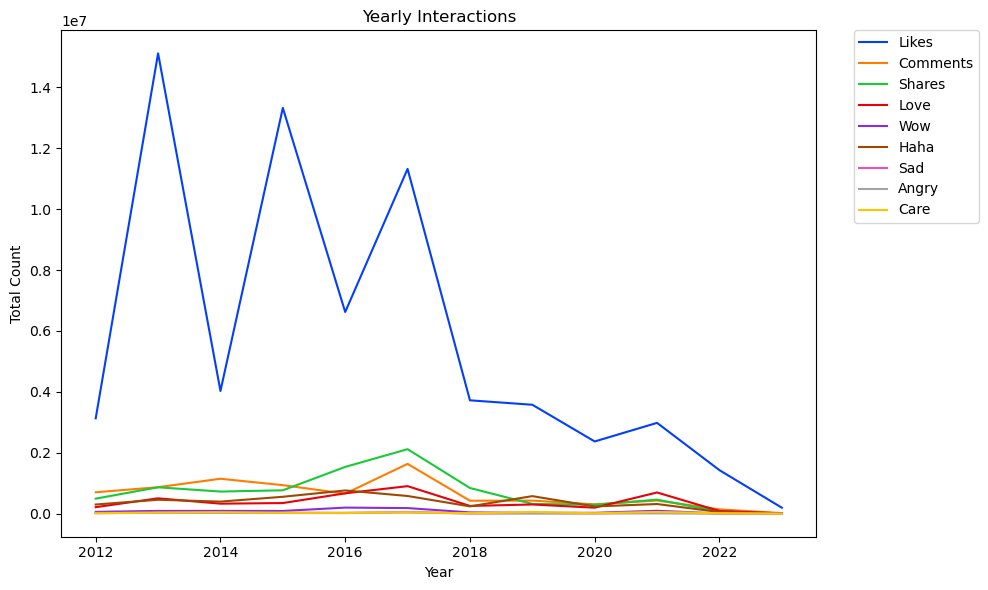

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
#sns.set(style="whitegrid")
yearly_data = df.groupby('year')[[ 'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].sum()

yearly_data = yearly_data.reset_index()
yearly_data['year'] = yearly_data['year'].dt.year

# Convert other columns to numeric
for col in ['Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']:
    yearly_data[col] = pd.to_numeric(yearly_data[col], errors='coerce')

melted_data = yearly_data.melt(id_vars='year', var_name='Category', value_name='Count')
print(melted_data.head())



# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='year', y='Count', hue='Category', data=melted_data, palette='bright')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Titles and labels
plt.title('Yearly Interactions')
plt.xlabel('Year')
plt.ylabel('Total Count')

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot if needed
# plt.savefig('yearly_interactions_seaborn.png', bbox_inches='tight')


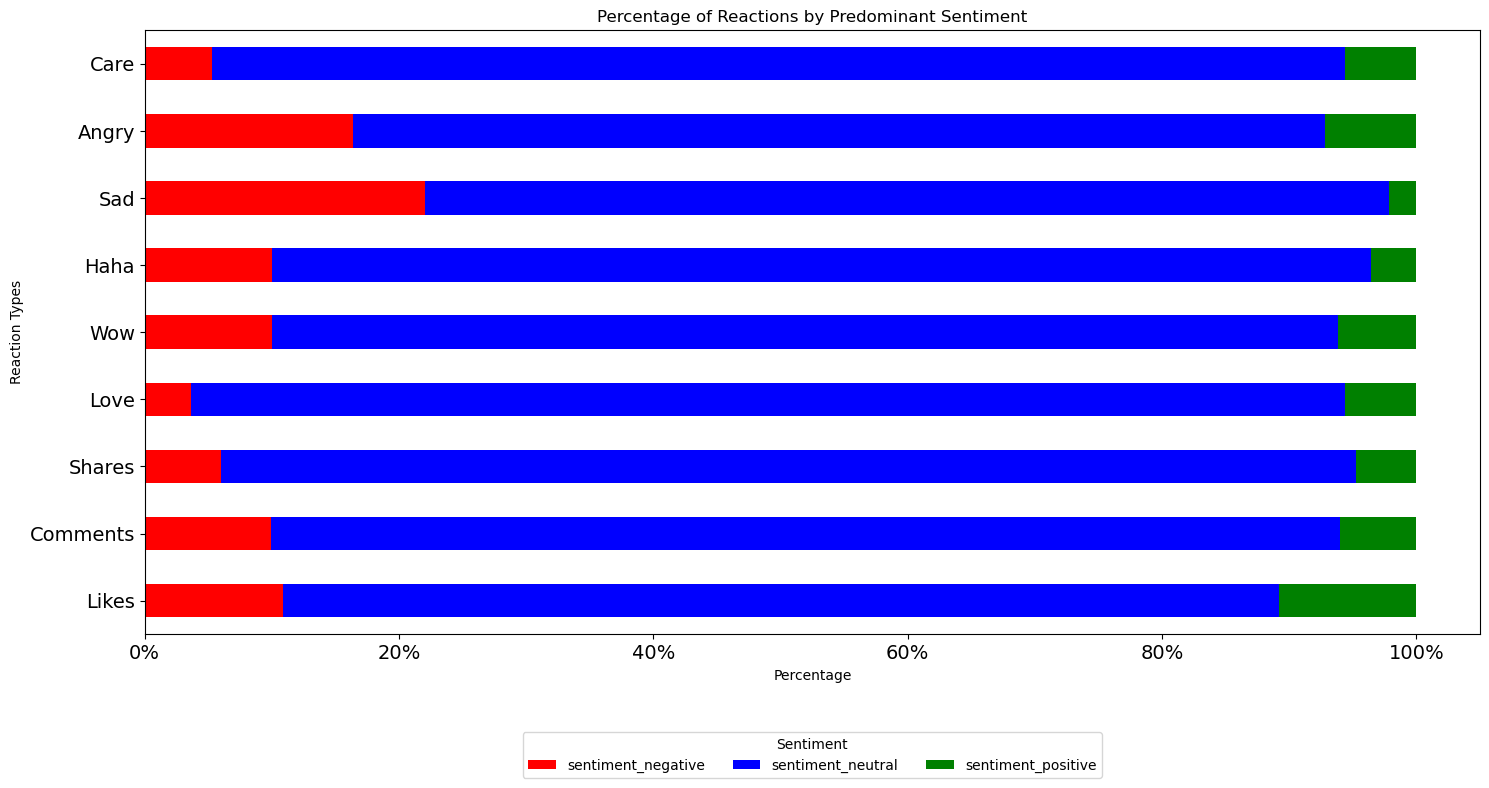

In [5]:


# Determine the predominant sentiment for each row
df['predominant_sentiment'] = df[['sentiment_neutral', 'sentiment_positive', 'sentiment_negative']].idxmax(axis=1)

# Group by the predominant sentiment and calculate the sum for each reaction type
grouped_data = df.groupby('predominant_sentiment')[['Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].sum()

# Compute the percentages for each reaction type within each sentiment category
percent_data = grouped_data.div(grouped_data.sum(axis=0), axis=1) * 100

# Define colors for each sentiment
sentiment_colors = ['red', 'blue', 'green']  # Negative, Neutral, Positive

# Plot a horizontal bar chart
ax = percent_data.T.plot(kind='barh', figsize=(15, 8), stacked=True, color=sentiment_colors)

# Set the title and labels
plt.title('Percentage of Reactions by Predominant Sentiment')
plt.xlabel('Percentage')
plt.ylabel('Reaction Types')

# Format the x-axis to display percentage
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x)))

# Move the legend outside of the plot, at the bottom
ax.legend(title='Sentiment', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(grouped_data.columns))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show the plot with a tight layout
plt.tight_layout()
plt.show()


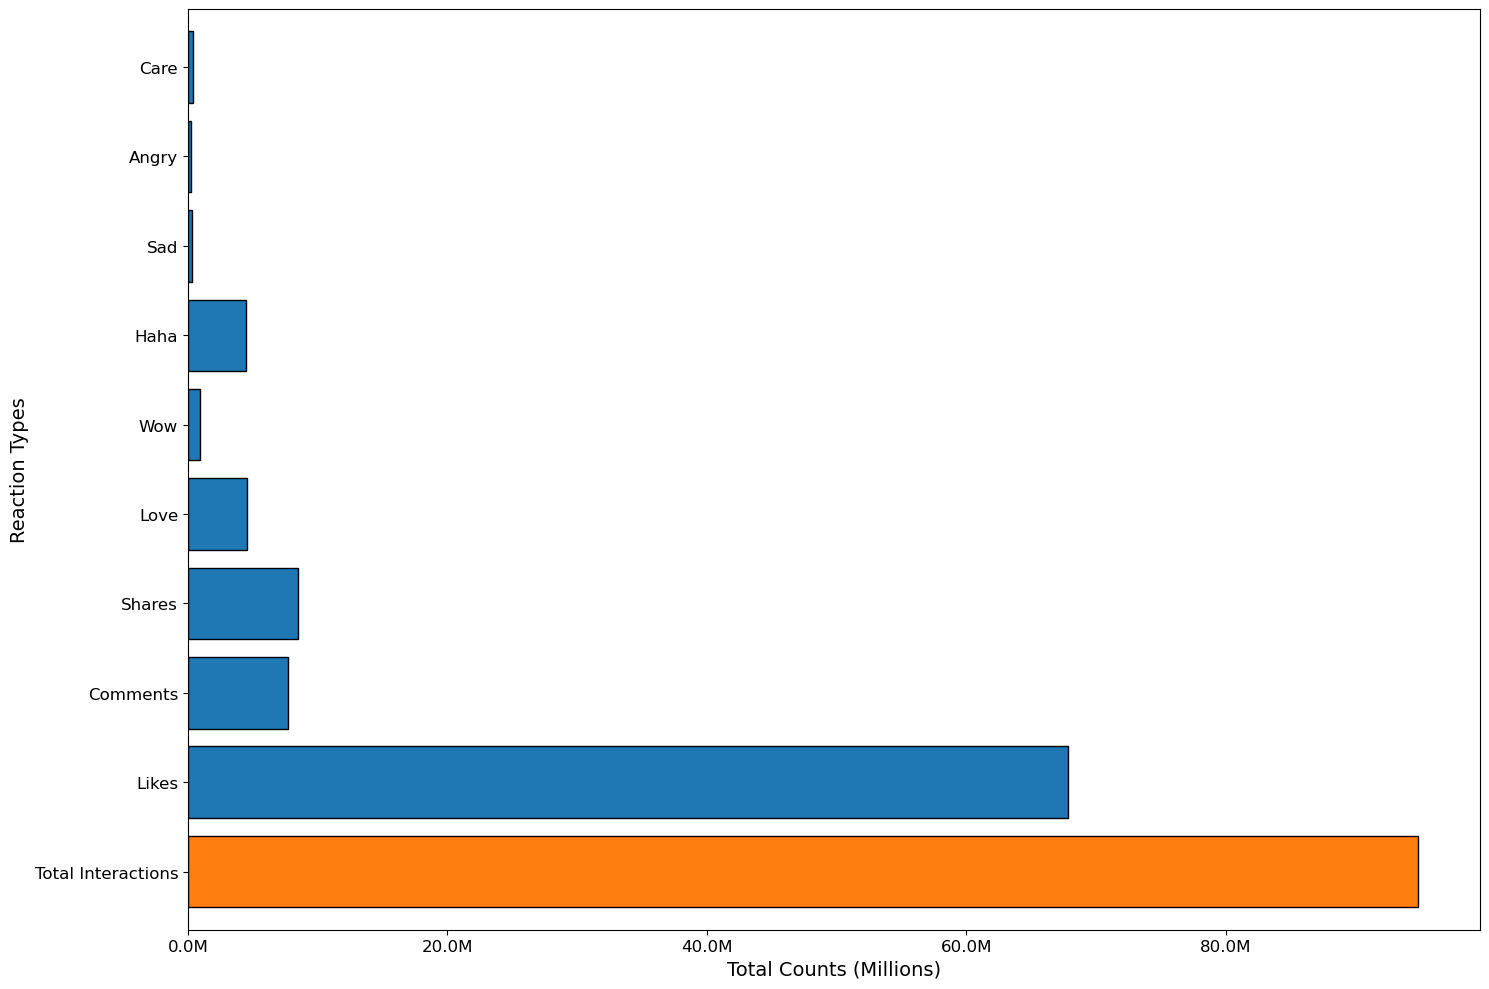

In [6]:


# Calculate the sum for each of the specified columns and convert to millions
aggregated_data = df[['Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].aggregate('sum') / 1_000_000

# Create a color list, using a different color for 'Total Interactions'
colors = ['#1f77b4' if x != 'Total Interactions' else '#ff7f0e' for x in aggregated_data.index]

# Create a horizontal bar chart with a specified figure size
aggregated_data.plot(kind='barh', figsize=(15, 10), color=colors, edgecolor='black', width=0.8)

# Set the title and labels with increased font size
#plt.title('Aggregate of Reactions (in Millions)', fontsize=18)
plt.xlabel('Total Counts (Millions)', fontsize=14)
plt.ylabel('Reaction Types', fontsize=14)

# Format the x-axis tick labels to include 'M' after the number
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x)))

# Increase the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot with a tight layout to ensure everything fits
plt.tight_layout()
plt.show()

In [7]:
#Computing the compound value


# Define weights for each sentiment type
weights = {'sentiment_negative': -1, 'sentiment_neutral': 0, 'sentiment_positive': 1}

# Calculate the compound sentiment score
df['compound_sentiment'] = (df['sentiment_negative'] * weights['sentiment_negative'] +
                            df['sentiment_neutral'] * weights['sentiment_neutral'] +
                            df['sentiment_positive'] * weights['sentiment_positive'])

df


,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,sentiment_positive,sentiment_negative,sentiment_neutral,date,year,predominant_sentiment,compound_sentiment
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-25 02:20:00,0,Cheat Codes ATL,cheatcodesatlanta,1.000000e+14,ORG_GENERAL,US,Cheat Codes is a media company that empowers p...,25/01/2017 02:20,NaN,NaN,2017-01-27 23:07:20 EET,27/01/2017,23:07:20,Native Video,693941,158940,14557,489013,26618,4173,562,33,22,23,owned,Yes,5501036,13220839,0,00:02:54,https://www.facebook.com/243388192784668/posts...,180 seconds of basic economics explained perfe...,https://www.facebook.com/cheatcodesatlanta/vid...,NaN,NaN,Basic Economics,NaN,NaN,NaN,NaN,693941,"4,283.59",0.051737,0.022936,0.925327,2017-01-25 02:20:00,2017,sentiment_neutral,0.028801
2013-09-25 01:30:00,1,Batdad,BatDadOfficial,1.000000e+14,DIGITAL_CREATOR,US,I'm BatDad,25/09/2013 01:30,6857356.0,NaN,2017-12-17 00:01:18 EET,17/12/2017,00:01:18,Native Video,260982,80239,31039,85119,5482,426,58632,26,19,0,owned,Yes,4623022,8386430,0,00:01:11,https://www.facebook.com/603370039706496/posts...,Bitcoin Insta - batdadblake,https://www.facebook.com/BatDadOfficial/videos...,NaN,NaN,Bitcoin,NaN,NaN,NaN,NaN,260982,184.31,0.043961,0.015284,0.940754,2013-09-25 01:30:00,2013,sentiment_neutral,0.028677
2017-12-14 12:27:00,2,John-Paul Ugwu,jpaulugwu2,1.000000e+14,PERSONAL_BLOG,NG,We are news Network,14/12/2017 12:27,NaN,NaN,2017-12-17 02:06:24 EET,17/12/2017,02:06:24,Photo,192551,54109,51315,66147,5285,144,35,15456,57,3,NaN,-,0,0,0,NaN,https://www.facebook.com/840426409473000/posts...,Today is the saddest day of my life. As a Doct...,https://www.facebook.com/saharawaveonline/phot...,NaN,NaN,Photos from Sahara Waves's post,NaN,NaN,NaN,NaN,192551,"2,790.59",0.038404,0.225466,0.736130,2017-12-14 12:27:00,2017,sentiment_neutral,-0.187062
2017-06-05 19:19:00,3,Bitcoin & Crypto,bitcoinandcrypto,1.000000e+14,ACTIVITY_GENERAL,US,Bringing you the latest news and analyses on t...,05/06/2017 19:19,NaN,NaN,2017-07-01 19:46:35 EEST,01/07/2017,19:46:35,Photo,148311,139117,2087,2465,1683,2183,730,33,13,0,NaN,-,0,0,0,NaN,https://www.facebook.com/172311083301956/posts...,"Well people can stop saying ""What can you buy ...",https://www.facebook.com/bitcoinandcrypto/phot...,NaN,NaN,Timeline photos,NaN,NaN,NaN,NaN,148311,251.8,0.040747,0.030607,0.928647,2017-06-05 19:19:00,2017,sentiment_neutral,0.010140
2017-12-02 11:19:00,4,LoanCoin,LoanCoin2017,1.000000e+14,TOPIC_BUSINESS_SERVICES,TH,"LOANCOIN has designed an advanced ""loan system...",02/12/2017 11:19,176368.0,NaN,2017-12-22 05:56:21 EET,22/12/2017,05:56:21,Photo,131936,131776,41,9,69,27,9,3,2,0,NaN,-,0,0,0,NaN,https://www.facebook.com/378340149272452/posts...,"Dear Investors, 1) Please do not share your pe...",https://www.facebook.com/LoanCoin2017/photos/a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131936,39.22,0.090149,0.070592,0.839259,2017-12-02 11:19:00,2017,sentiment_neutral,0.019557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-17 13:47:00,9970,City of Woodinville - Government,WoodinvilleCity,1.000000e+14,GOVERNMENT_ORGANIZATION,US,"Official page of City of Woodinville, a munici...",17/09/2013 13:47,4149.0,4789.0,2023-10-04 00:00:00 EEST,04/10/2023,00:00:00,Photo,5,2,0,3,0,0,0,0,0,0,NaN,-,0,0,0,NaN,

In [8]:


# Assign weights to each reaction type
weights = {
    'Likes': 0.1,
    'Comments': 0.05,
    'Shares': 0.2,
    'Love': 0.5,
    'Wow': 0.5,
    'Haha': 0.5,
    'Sad': -0.5,
    'Angry': -0.5,
    'Care': 0.5
}

# Calculate sentiment intensity for each row
def calculate_intensity(row, weights):
    intensity = 0
    for reaction, weight in weights.items():
        intensity += (np.log(row[reaction] + 1) * weight)
    return intensity

# Apply the function to each row
df['sentiment_intensity'] = df.apply(calculate_intensity, axis=1, weights=weights)

# Add the calculated intensity to the SentiWordNet base score for each row
# Assuming SentiWordNet score is a column in df named 'senti_score'
df['final_sentiment_score'] = df['compound_sentiment'] + df['sentiment_intensity']

# Now df['final_sentiment_score'] contains the final sentiment score for each row


In [9]:
df.head()

,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,sentiment_positive,sentiment_negative,sentiment_neutral,date,year,predominant_sentiment,compound_sentiment,sentiment_intensity,final_sentiment_score
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-25 02:20:00,0,Cheat Codes ATL,cheatcodesatlanta,1.000000e+14,ORG_GENERAL,US,Cheat Codes is a media company that empowers p...,25/01/2017 02:20,NaN,NaN,2017-01-27 23:07:20 EET,27/01/2017,23:07:20,Native Video,693941,158940,14557,489013,26618,4173,562,33,22,23,owned,Yes,5501036,13220839,0,00:02:54,https://www.facebook.com/243388192784668/posts...,180 seconds of basic economics explained perfe...,https://www.facebook.com/cheatcodesatlanta/vid...,NaN,NaN,Basic Economics,NaN,NaN,NaN,NaN,693941,"4,283.59",0.051737,0.022936,0.925327,2017-01-25 02:20:00,2017,sentiment_neutral,0.028801,14.984698,15.013499
2013-09-25 01:30:00,1,Batdad,BatDadOfficial,1.000000e+14,DIGITAL_CREATOR,US,I'm BatDad,25/09/2013 01:30,6857356.0,NaN,2017-12-17 00:01:18 EET,17/12/2017,00:01:18,Native Video,260982,80239,31039,85119,5482,426,58632,26,19,0,owned,Yes,4623022,8386430,0,00:01:11,https://www.facebook.com/603370039706496/posts...,Bitcoin Insta - batdadblake,https://www.facebook.com/BatDadOfficial/videos...,NaN,NaN,Bitcoin,NaN,NaN,NaN,NaN,260982,184.31,0.043961,0.015284,0.940754,2013-09-25 01:30:00,2013,sentiment_neutral,0.028677,13.593631,13.622308
2017-12-14 12:27:00,2,John-Paul Ugwu,jpaulugwu2,1.000000e+14,PERSONAL_BLOG,NG,We are news Network,14/12/2017 12:27,NaN,NaN,2017-12-17 02:06:24 EET,17/12/2017,02:06:24,Photo,192551,54109,51315,66147,5285,144,35,15456,57,3,NaN,-,0,0,0,NaN,https://www.facebook.com/840426409473000/posts...,Today is the saddest day of my life. As a Doct...,https://www.facebook.com/saharawaveonline/phot...,NaN,NaN,Photos from Sahara Waves's post,NaN,NaN,NaN,NaN,192551,"2,790.59",0.038404,0.225466,0.736130,2017-12-14 12:27:00,2017,sentiment_neutral,-0.187062,6.258647,6.071585
2017-06-05 19:19:00,3,Bitcoin & Crypto,bitcoinandcrypto,1.000000e+14,ACTIVITY_GENERAL,US,Bringing you the latest news and analyses on t...,05/06/2017 19:19,NaN,NaN,2017-07-01 19:46:35 EEST,01/07/2017,19:46:35,Photo,148311,139117,2087,2465,1683,2183,730,33,13,0,NaN,-,0,0,0,NaN,https://www.facebook.com/172311083301956/posts...,"Well people can stop saying ""What can you buy ...",https://www.facebook.com/bitcoinandcrypto/phot...,NaN,NaN,Timeline photos,NaN,NaN,NaN,NaN,148311,251.8,0.040747,0.030607,0.928647,2017-06-05 19:19:00,2017,sentiment_neutral,0.010140,10.901994,10.912135
2017-12-02 11:19:00,4,LoanCoin,LoanCoin2017,1.000000e+14,TOPIC_BUSINESS_SERVICES,TH,"LOANCOIN has designed an advanced ""loan system...",02/12/2017 11:19,176368.0,NaN,2017-12-22 05:56:21 EET,22/12/2017,05:56:21,Photo,131936,131776,41,9,69,27,9,3,2,0,NaN,-,0,0,0,NaN,https://www.facebook.com/378340149272452/posts...,"Dear Investors, 1) Please do not share your pe...",https://www.facebook.com/LoanCoin2017/photos/a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131936,39.22,0.090149,0.070592,0.839259,2017-12-02 11:19:00,2017,sentiment_neutral,0.019557,5.525476,5.545033


In [10]:
#Computing the compound value

# This will give a score in the range [-1, 1]
df['compound'] = (df['sentiment_positive'] - df['sentiment_negative']) / (df['sentiment_positive'] 
                                                                          + df['sentiment_negative'] + df['sentiment_neutral'])

df.head()

,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,sentiment_positive,sentiment_negative,sentiment_neutral,date,year,predominant_sentiment,compound_sentiment,sentiment_intensity,final_sentiment_score,compound
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-25 02:20:00,0,Cheat Codes ATL,cheatcodesatlanta,1.000000e+14,ORG_GENERAL,US,Cheat Codes is a media company that empowers p...,25/01/2017 02:20,NaN,NaN,2017-01-27 23:07:20 EET,27/01/2017,23:07:20,Native Video,693941,158940,14557,489013,26618,4173,562,33,22,23,owned,Yes,5501036,13220839,0,00:02:54,https://www.facebook.com/243388192784668/posts...,180 seconds of basic economics explained perfe...,https://www.facebook.com/cheatcodesatlanta/vid...,NaN,NaN,Basic Economics,NaN,NaN,NaN,NaN,693941,"4,283.59",0.051737,0.022936,0.925327,2017-01-25 02:20:00,2017,sentiment_neutral,0.028801,14.984698,15.013499,0.028801
2013-09-25 01:30:00,1,Batdad,BatDadOfficial,1.000000e+14,DIGITAL_CREATOR,US,I'm BatDad,25/09/2013 01:30,6857356.0,NaN,2017-12-17 00:01:18 EET,17/12/2017,00:01:18,Native Video,260982,80239,31039,85119,5482,426,58632,26,19,0,owned,Yes,4623022,8386430,0,00:01:11,https://www.facebook.com/603370039706496/posts...,Bitcoin Insta - batdadblake,https://www.facebook.com/BatDadOfficial/videos...,NaN,NaN,Bitcoin,NaN,NaN,NaN,NaN,260982,184.31,0.043961,0.015284,0.940754,2013-09-25 01:30:00,2013,sentiment_neutral,0.028677,13.593631,13.622308,0.028677
2017-12-14 12:27:00,2,John-Paul Ugwu,jpaulugwu2,1.000000e+14,PERSONAL_BLOG,NG,We are news Network,14/12/2017 12:27,NaN,NaN,2017-12-17 02:06:24 EET,17/12/2017,02:06:24,Photo,192551,54109,51315,66147,5285,144,35,15456,57,3,NaN,-,0,0,0,NaN,https://www.facebook.com/840426409473000/posts...,Today is the saddest day of my life. As a Doct...,https://www.facebook.com/saharawaveonline/phot...,NaN,NaN,Photos from Sahara Waves's post,NaN,NaN,NaN,NaN,192551,"2,790.59",0.038404,0.225466,0.736130,2017-12-14 12:27:00,2017,sentiment_neutral,-0.187062,6.258647,6.071585,-0.187062
2017-06-05 19:19:00,3,Bitcoin & Crypto,bitcoinandcrypto,1.000000e+14,ACTIVITY_GENERAL,US,Bringing you the latest news and analyses on t...,05/06/2017 19:19,NaN,NaN,2017-07-01 19:46:35 EEST,01/07/2017,19:46:35,Photo,148311,139117,2087,2465,1683,2183,730,33,13,0,NaN,-,0,0,0,NaN,https://www.facebook.com/172311083301956/posts...,"Well people can stop saying ""What can you buy ...",https://www.facebook.com/bitcoinandcrypto/phot...,NaN,NaN,Timeline photos,NaN,NaN,NaN,NaN,148311,251.8,0.040747,0.030607,0.928647,2017-06-05 19:19:00,2017,sentiment_neutral,0.010140,10.901994,10.912135,0.010140
2017-12-02 11:19:00,4,LoanCoin,LoanCoin2017,1.000000e+14,TOPIC_BUSINESS_SERVICES,TH,"LOANCOIN has designed an advanced ""loan system...",02/12/2017 11:19,176368.0,NaN,2017-12-22 05:56:21 EET,22/12/2017,05:56:21,Photo,131936,131776,41,9,69,27,9,3,2,0,NaN,-,0,0,0,NaN,https://www.facebook.com/378340149272452/posts...,"Dear Investors, 1) Please do not share your pe...",https://www.facebook.com/LoanCoin2017/photos/a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131936,39.22,0.090149,0.070592,0.839259,2017-12-02 11:19:00,2017,sentiment_neutral,0.019557,5.525476,5.545033,0.019557


In [11]:

# Convert the column to datetime using mixed format
import pandas as pd
from datetime import datetime
import pytz

def custom_date_parser(date_str):
    # Example date format: "2017-07-01 19:46:35 EEST"
    # Adjust the slicing or parsing as needed for your date format
    date_str_no_tz = date_str.rsplit(' ', 1)[0]  # Remove timezone abbreviation
    dt = datetime.strptime(date_str_no_tz, '%Y-%m-%d %H:%M:%S')
    tz = pytz.timezone('Europe/Helsinki')  # EEST corresponds to Helsinki time
    dt = tz.localize(dt)
    return dt

# Apply the function to the date column
df['date'] = df['Post Created'].apply(custom_date_parser)

# Assuming df_sentiment['date'] is timezone-aware and df_btc['date'] is timezone-naive
df['date'] = df['date'].dt.tz_localize(None)
# Set the index to the new date column
df.set_index('date', inplace=True)

# Save to CSV
df.to_csv(path_datasets+"posts.csv", index=True)
df


,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,sentiment_positive,sentiment_negative,sentiment_neutral,year,predominant_sentiment,compound_sentiment,sentiment_intensity,final_sentiment_score,compound
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-27 23:07:20,0,Cheat Codes ATL,cheatcodesatlanta,1.000000e+14,ORG_GENERAL,US,Cheat Codes is a media company that empowers p...,25/01/2017 02:20,NaN,NaN,2017-01-27 23:07:20 EET,27/01/2017,23:07:20,Native Video,693941,158940,14557,489013,26618,4173,562,33,22,23,owned,Yes,5501036,13220839,0,00:02:54,https://www.facebook.com/243388192784668/posts...,180 seconds of basic economics explained perfe...,https://www.facebook.com/cheatcodesatlanta/vid...,NaN,NaN,Basic Economics,NaN,NaN,NaN,NaN,693941,"4,283.59",0.051737,0.022936,0.925327,2017,sentiment_neutral,0.028801,14.984698,15.013499,0.028801
2017-12-17 00:01:18,1,Batdad,BatDadOfficial,1.000000e+14,DIGITAL_CREATOR,US,I'm BatDad,25/09/2013 01:30,6857356.0,NaN,2017-12-17 00:01:18 EET,17/12/2017,00:01:18,Native Video,260982,80239,31039,85119,5482,426,58632,26,19,0,owned,Yes,4623022,8386430,0,00:01:11,https://www.facebook.com/603370039706496/posts...,Bitcoin Insta - batdadblake,https://www.facebook.com/BatDadOfficial/videos...,NaN,NaN,Bitcoin,NaN,NaN,NaN,NaN,260982,184.31,0.043961,0.015284,0.940754,2013,sentiment_neutral,0.028677,13.593631,13.622308,0.028677
2017-12-17 02:06:24,2,John-Paul Ugwu,jpaulugwu2,1.000000e+14,PERSONAL_BLOG,NG,We are news Network,14/12/2017 12:27,NaN,NaN,2017-12-17 02:06:24 EET,17/12/2017,02:06:24,Photo,192551,54109,51315,66147,5285,144,35,15456,57,3,NaN,-,0,0,0,NaN,https://www.facebook.com/840426409473000/posts...,Today is the saddest day of my life. As a Doct...,https://www.facebook.com/saharawaveonline/phot...,NaN,NaN,Photos from Sahara Waves's post,NaN,NaN,NaN,NaN,192551,"2,790.59",0.038404,0.225466,0.736130,2017,sentiment_neutral,-0.187062,6.258647,6.071585,-0.187062
2017-07-01 19:46:35,3,Bitcoin & Crypto,bitcoinandcrypto,1.000000e+14,ACTIVITY_GENERAL,US,Bringing you the latest news and analyses on t...,05/06/2017 19:19,NaN,NaN,2017-07-01 19:46:35 EEST,01/07/2017,19:46:35,Photo,148311,139117,2087,2465,1683,2183,730,33,13,0,NaN,-,0,0,0,NaN,https://www.facebook.com/172311083301956/posts...,"Well people can stop saying ""What can you buy ...",https://www.facebook.com/bitcoinandcrypto/phot...,NaN,NaN,Timeline photos,NaN,NaN,NaN,NaN,148311,251.8,0.040747,0.030607,0.928647,2017,sentiment_neutral,0.010140,10.901994,10.912135,0.010140
2017-12-22 05:56:21,4,LoanCoin,LoanCoin2017,1.000000e+14,TOPIC_BUSINESS_SERVICES,TH,"LOANCOIN has designed an advanced ""loan system...",02/12/2017 11:19,176368.0,NaN,2017-12-22 05:56:21 EET,22/12/2017,05:56:21,Photo,131936,131776,41,9,69,27,9,3,2,0,NaN,-,0,0,0,NaN,https://www.facebook.com/378340149272452/posts...,"Dear Investors, 1) Please do not share your pe...",https://www.facebook.com/LoanCoin2017/photos/a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131936,39.22,0.090149,0.070592,0.839259,2017,sentiment_neutral,0.019557,5.525476,5.545033,0.019557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04 00:00:00,9970,City of Woodinville - Government,WoodinvilleCity,1.000000e+14,GOVERNMENT_ORGANIZATION,US,"Official page of City of Woodinville, a munici...",17/09/2013 13:47,414

In [12]:

df['weighted_sentiment_positive'] = df['sentiment_positive'] * df['Total Interactions']
df['weighted_sentiment_negative'] = df['sentiment_negative'] * df['Total Interactions']
df['weighted_sentiment_neutral'] = df['sentiment_neutral'] * df['Total Interactions']

daily_interactions=df[['Total Interactions','weighted_sentiment_neutral', 'weighted_sentiment_negative',
                       'weighted_sentiment_positive']].resample("D").sum()

daily_interactions['weighted_positive'] = daily_interactions['weighted_sentiment_positive'] /daily_interactions['Total Interactions']
daily_interactions['weighted_negative'] = daily_interactions['weighted_sentiment_negative'] / daily_interactions['Total Interactions']
daily_interactions['weighted_neutral'] = daily_interactions['weighted_sentiment_neutral'] /daily_interactions['Total Interactions']
daily_interactions.interpolate(method='linear', inplace=True)
# This will give a score in the range [-1, 1]
daily_interactions['weighted_compound'] = (daily_interactions['weighted_positive'] -
                                  daily_interactions['weighted_negative']) / (daily_interactions['weighted_positive'] 
                         + daily_interactions['weighted_negative'] + daily_interactions['weighted_neutral'])

daily_interactions

,Total Interactions,weighted_sentiment_neutral,weighted_sentiment_negative,weighted_sentiment_positive,weighted_positive,weighted_negative,weighted_neutral,weighted_compound
date,,,,,,,,
2015-01-04,881,52.402093,805.337268,23.260618,0.026403,0.914117,0.059480,-0.887715
2015-01-05,0,0.000000,0.000000,0.000000,0.018802,0.920015,0.061183,-0.901213
2015-01-06,605,38.045971,560.177134,6.776883,0.011201,0.925913,0.062886,-0.914711
2015-01-07,319,35.805121,278.770315,4.424540,0.013870,0.873888,0.112242,-0.860018
2015-01-08,0,0.000000,0.000000,0.000000,0.021936,0.451897,0.526167,-0.429961
...,...,...,...,...,...,...,...,...
2023-10-11,12798,9052.536604,1908.120226,1837.343172,0.143565,0.149095,0.707340,-0.005530
2023-10-12,13263,9871.979908,1461.648338,1929.371684,0.145470,0.110205,0.744325,0.035265
2023-10-13,26408,17495.801600,669.032371,8243.166165,0.312147,0.025334,0.662519,0.286812


In [13]:
sentiment=df[['compound_sentiment','sentiment_intensity' ,'final_sentiment_score']].resample("D").mean()
sentiment.interpolate(method='linear', inplace=True)

sentiment

,compound_sentiment,sentiment_intensity,final_sentiment_score
date,,,
2015-01-04,-0.887715,1.108585,0.220870
2015-01-05,-0.901213,1.494833,0.593620
2015-01-06,-0.914711,1.881081,0.966370
2015-01-07,-0.860018,1.607967,0.747949
2015-01-08,-0.429397,1.651166,1.221770
...,...,...,...
2023-10-11,-0.006786,1.190774,1.183989
2023-10-12,-0.023265,1.171863,1.148598
2023-10-13,0.041183,1.063701,1.104884


In [14]:
Reactions=df[['Likes', 'Comments' ,'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']].resample("D").sum()
Reactions.interpolate(method='linear', inplace=True)
df_sentiment=pd.concat([Reactions,sentiment, daily_interactions], axis=1)

In [15]:
df_sentiment.head()

,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,compound_sentiment,sentiment_intensity,final_sentiment_score,Total Interactions,weighted_sentiment_neutral,weighted_sentiment_negative,weighted_sentiment_positive,weighted_positive,weighted_negative,weighted_neutral,weighted_compound
date,,,,,,,,,,,,,,,,,,,,
2015-01-04,300,579,2,0,0,0,0,0,0,-0.887715,1.108585,0.220870,881,52.402093,805.337268,23.260618,0.026403,0.914117,0.059480,-0.887715
2015-01-05,0,0,0,0,0,0,0,0,0,-0.901213,1.494833,0.593620,0,0.000000,0.000000,0.000000,0.018802,0.920015,0.061183,-0.901213
2015-01-06,286,46,273,0,0,0,0,0,0,-0.914711,1.881081,0.966370,605,38.045971,560.177134,6.776883,0.011201,0.925913,0.062886,-0.914711
2015-01-07,197,28,94,0,0,0,0,0,0,-0.860018,1.607967,0.747949,319,35.805121,278.770315,4.424540,0.013870,0.873888,0.112242,-0.860018
2015-01-08,0,0,0,0,0,0,0,0,0,-0.429397,1.651166,1.221770,0,0.000000,0.000000,0.000000,0.021936,0.451897,0.526167,-0.429961


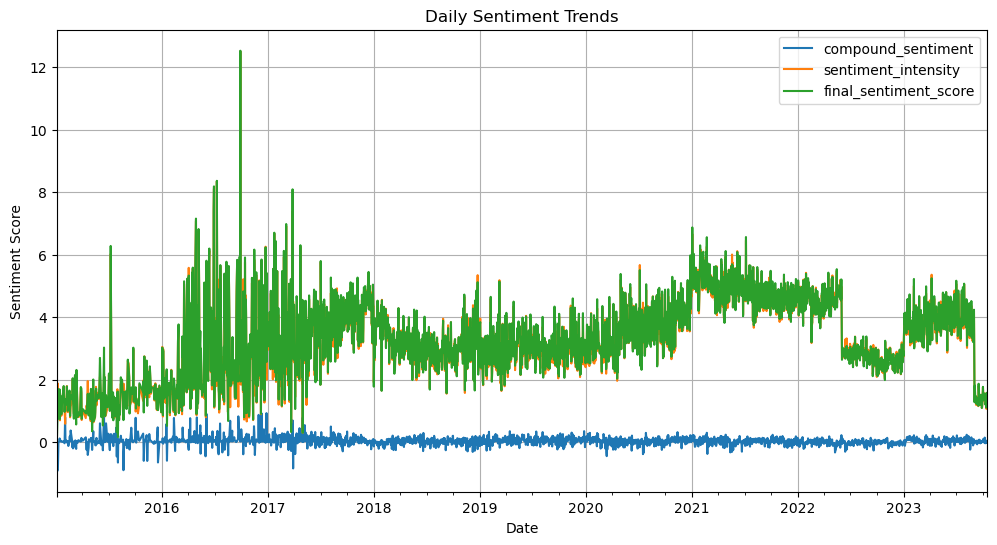

In [16]:


# Plotting the resampled sentiment data
sentiment.plot(kind='line', figsize=(12, 6))

# Setting the title and labels
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)

# Show the plot
plt.show()


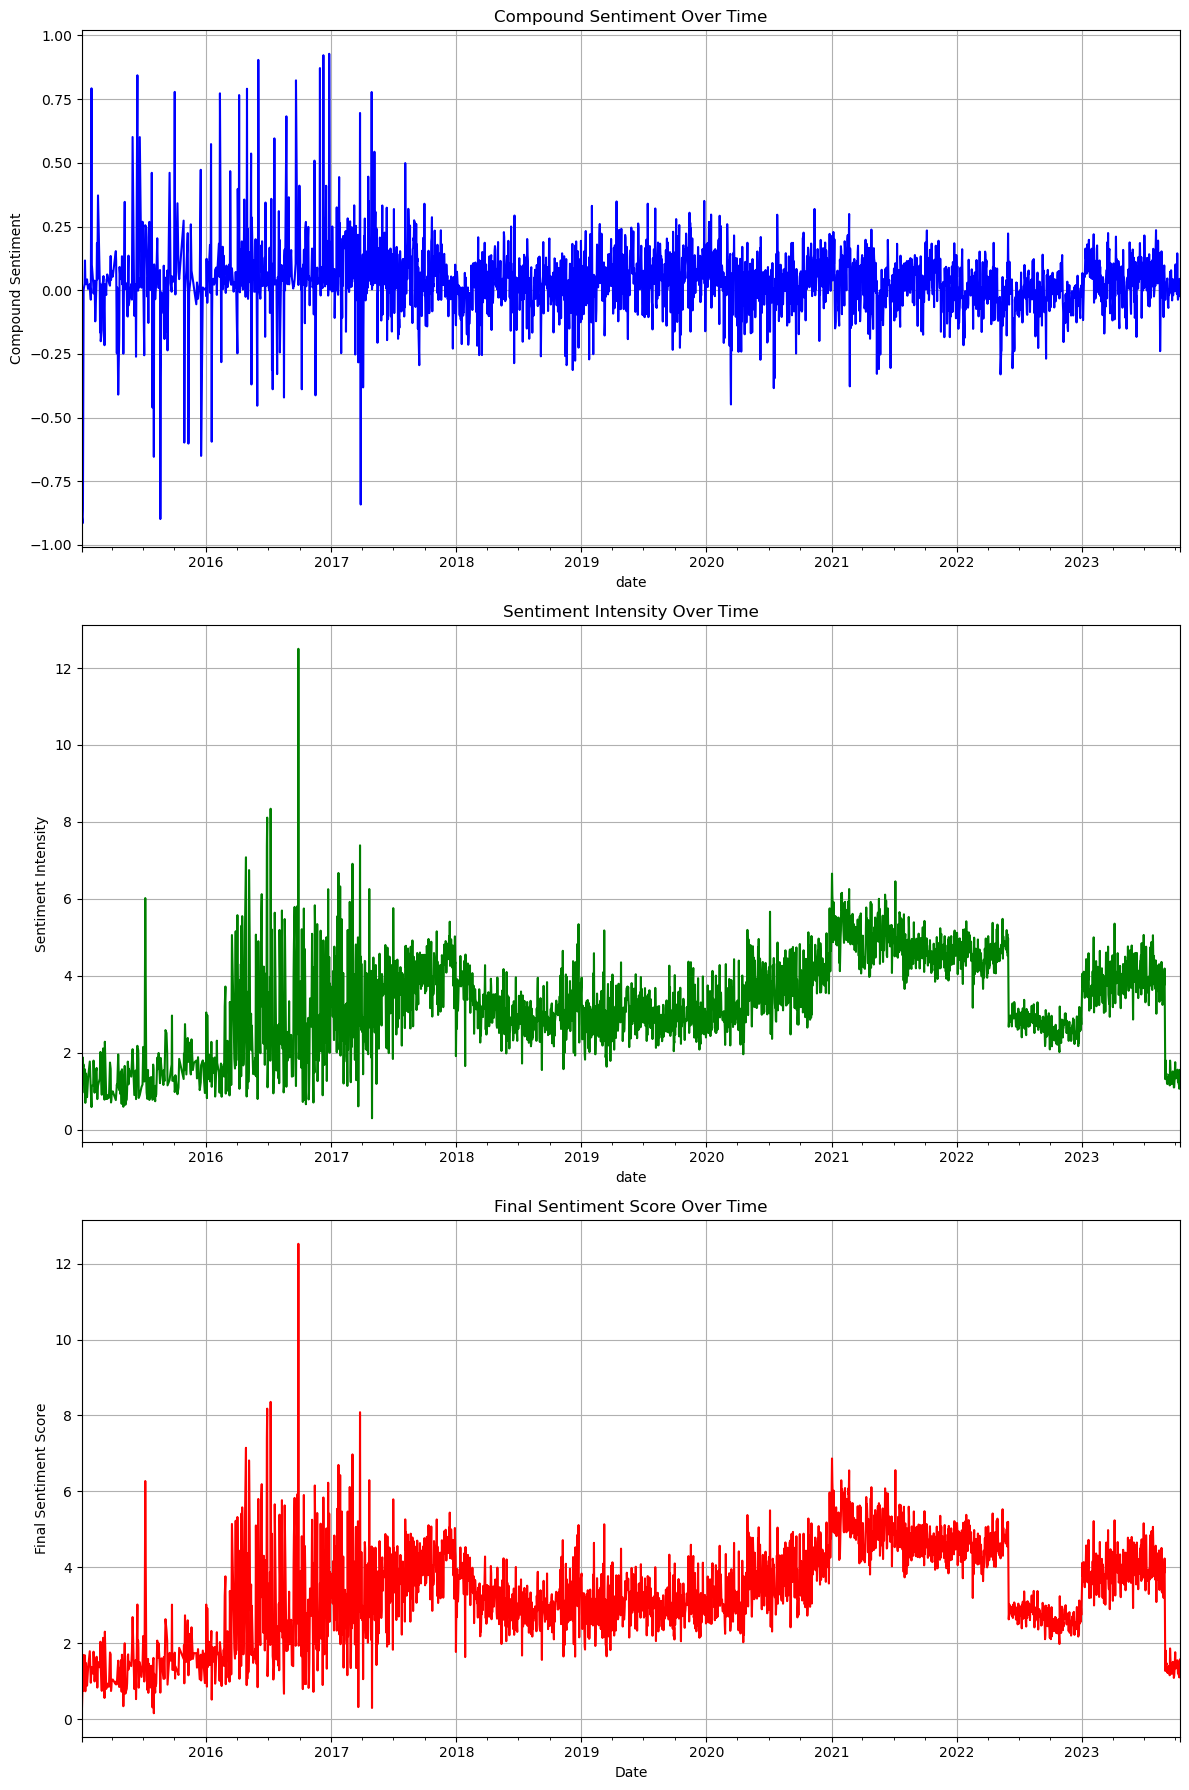

In [17]:


# Plotting separate charts for each sentiment measure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plot each sentiment on a separate subplot
sentiment['compound_sentiment'].plot(ax=axes[0], title='Compound Sentiment Over Time', color='blue', grid=True)
sentiment['sentiment_intensity'].plot(ax=axes[1], title='Sentiment Intensity Over Time', color='green', grid=True)
sentiment['final_sentiment_score'].plot(ax=axes[2], title='Final Sentiment Score Over Time', color='red', grid=True)

# Set labels
axes[0].set_ylabel('Compound Sentiment')
axes[1].set_ylabel('Sentiment Intensity')
axes[2].set_ylabel('Final Sentiment Score')
axes[2].set_xlabel('Date')

# Show the plot
plt.tight_layout()
plt.show()


In [18]:
#transform to small characters

df['Message'] = df['Message'].str.lower()

In [19]:
#remove tags and links

def remove_usernames_links(post):
    post = re.sub('@[^\s]+','',str(post))
    post = re.sub('http[^\s]+','',post)
    post = re.sub('www[^\s]+','',post)
    post = re.sub(r'\d+', '', post)
    return post

df['Message'] = df['Message'].apply(remove_usernames_links)

In [20]:
#getting rid of punctuations

def remove_punctuations(post):
    for char in string.punctuation:
        post = post.replace(char, '')
    return post

df['Message'] = df['Message'].apply(remove_punctuations)

In [21]:
df['Message']

date
2017-01-27 23:07:20     seconds of basic economics explained perfectl...
2017-12-17 00:01:18                           bitcoin insta  batdadblake
2017-12-17 02:06:24    today is the saddest day of my life as a docto...
2017-07-01 19:46:35    well people can stop saying what can you buy w...
2017-12-22 05:56:21    dear investors  please do not share your perso...
                                             ...                        
2023-10-04 00:00:00    bitcoin atm scams are on the rise and scammers...
2023-10-11 14:10:16    leaving coinbase but staying in crypto finance...
2023-09-27 23:27:49    at aes our main value is safety first heres ar...
2023-09-23 21:00:49    want to accept bitcoin and ethereum tips on tw...
2023-09-22 12:10:04    🔗 curious about what makes up a blockchain 🧱 d...
Name: Message, Length: 82810, dtype: object

In [22]:
#getting rid of different signs

df['Message'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [23]:
#remove stopwords and download the stopwords dictionary

#nltk.download('stopwords')
#nltk.download('punkt')
stop_words = set(stopwords.words('english'))
additional_stopwords= ['u','would']
stop_words.update(additional_stopwords)
df['Message'] = df['Message'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(str(x)) if word.lower() not in stop_words]))

In [24]:
#performing tokenization on text

#nltk.download('punkt')
df['Message']= df['Message'].apply(lambda x: nltk.word_tokenize(x))

In [25]:
#getting rid of the variation of the words
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a list of words
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Lemmatize the words
df['Message'] = df['Message'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielpele/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
#compute the words' frequency

word_counts = Counter([word for words in df['Message'] for word in words])
word_counts.pop('u', None)
word_count_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
top_words=word_count_df.nlargest(20, 'Count')

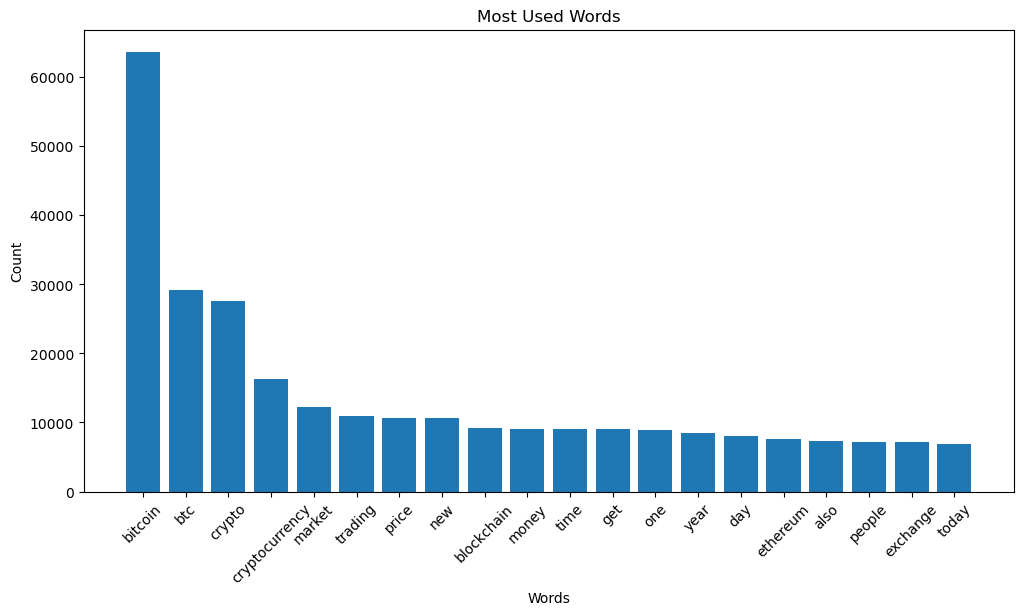

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a bar plot with the most used words

plt.figure(figsize=(12, 6))
plt.bar(top_words['Word'], top_words['Count'])
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Used Words')
plt.xticks(rotation=45)
plt.show()
plt.savefig('top_words.png', transparent=True)

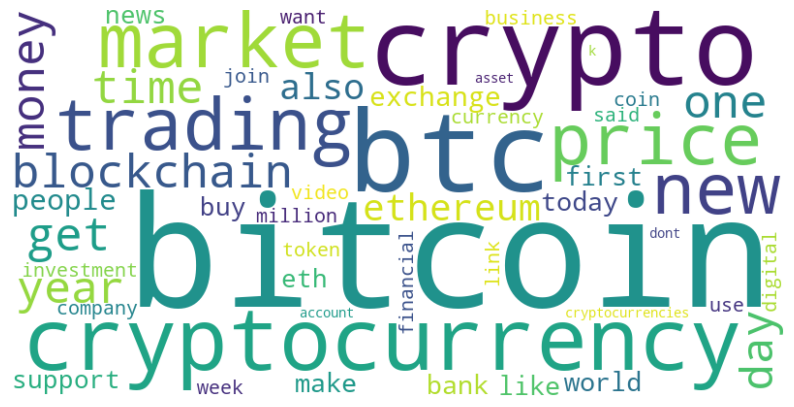

<Figure size 640x480 with 0 Axes>

In [28]:
#Creating a WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png', transparent=True)

In [29]:
df_btc = pd.read_csv(path_datasets+"BTC-USD.csv")
#df_btc = df_btc.iloc[2:3209,:4]
df_btc['date']=pd.to_datetime(df_btc['Date'])
df_btc.set_index(['date'])

,Date,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2023-11-23,2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,37289.621094,14214948217
2023-11-24,2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,37720.281250,22922957823
2023-11-25,2023-11-25,37721.414063,37892.429688,37617.417969,37796.792969,37796.792969,9099571165


In [30]:
df_btc_sent = pd.merge(df_sentiment, df_btc, on='date', how='inner')
df_btc_sent

,date,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,compound_sentiment,sentiment_intensity,final_sentiment_score,Total Interactions,weighted_sentiment_neutral,weighted_sentiment_negative,weighted_sentiment_positive,weighted_positive,weighted_negative,weighted_neutral,weighted_compound,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-04,300,579,2,0,0,0,0,0,0,-0.887715,1.108585,0.220870,881,52.402093,805.337268,23.260618,0.026403,0.914117,0.059480,-0.887715,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
1,2015-01-05,0,0,0,0,0,0,0,0,0,-0.901213,1.494833,0.593620,0,0.000000,0.000000,0.000000,0.018802,0.920015,0.061183,-0.901213,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2,2015-01-06,286,46,273,0,0,0,0,0,0,-0.914711,1.881081,0.966370,605,38.045971,560.177134,6.776883,0.011201,0.925913,0.062886,-0.914711,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
3,2015-01-07,197,28,94,0,0,0,0,0,0,-0.860018,1.607967,0.747949,319,35.805121,278.770315,4.424540,0.013870,0.873888,0.112242,-0.860018,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800
4,2015-01-08,0,0,0,0,0,0,0,0,0,-0.429397,1.651166,1.221770,0,0.000000,0.000000,0.000000,0.021936,0.451897,0.526167,-0.429961,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,2023-10-11,7958,2726,995,536,56,396,33,37,61,-0.006786,1.190774,1.183989,12798,9052.536604,1908.120226,1837.343172,0.143565,0.149095,0.707340,-0.005530,2023-10-11,27392.076172,27474.115234,26561.099609,26873.320313,26873.320313,13648094333
3203,2023-10-12,7202,2738,1043,1103,276,573,36,17,275,-0.023265,1.171863,1.148598,13263,9871.979908,1461.648338,1929.371684,0.145470,0.110205,0.744325,0.035265,2023-10-12,26873.292969,26921.439453,26558.320313,26756.798828,26756.798828,9392909295
3204,2023-10-13,21912,2093,742,813,279,315,21,28,205,0.041183,1.063701,1.104884,26408,17495.801600,669.032371,8243.166165,0.312147,0.025334,0.662519,0.286812,2023-10-13,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851
3205,2023-10-14,6066,1386,673,635,120,230,13,30,57,0.044699,1.216715,1.261414,9210,6681.789374,978.978755,1549.231860,0.168212,0.106295,0.725493,0.061917,2023-10-14,26866.203125,26969.000000,26814.585938,26861.707031,26861.707031,5388116782


In [31]:
df_btc_sent.to_csv(path_datasets+"btc_sentiment.csv", index=False)

In [32]:
#df_btc_sent = pd.read_csv("C:\\Users\\ZZ0373826\\Documents\\Doctorat\\CFE 2023\\Proiect\\btc_sentiment.csv")
#df_btc_sent = df_btc_sent.drop(df_btc_sent.columns[0], axis=1)
df_btc_sent['year'] = pd.DatetimeIndex(df_btc_sent['date']).year
df_btc_sent

,date,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,compound_sentiment,sentiment_intensity,final_sentiment_score,Total Interactions,weighted_sentiment_neutral,weighted_sentiment_negative,weighted_sentiment_positive,weighted_positive,weighted_negative,weighted_neutral,weighted_compound,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2015-01-04,300,579,2,0,0,0,0,0,0,-0.887715,1.108585,0.220870,881,52.402093,805.337268,23.260618,0.026403,0.914117,0.059480,-0.887715,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015
1,2015-01-05,0,0,0,0,0,0,0,0,0,-0.901213,1.494833,0.593620,0,0.000000,0.000000,0.000000,0.018802,0.920015,0.061183,-0.901213,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,2015
2,2015-01-06,286,46,273,0,0,0,0,0,0,-0.914711,1.881081,0.966370,605,38.045971,560.177134,6.776883,0.011201,0.925913,0.062886,-0.914711,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,2015
3,2015-01-07,197,28,94,0,0,0,0,0,0,-0.860018,1.607967,0.747949,319,35.805121,278.770315,4.424540,0.013870,0.873888,0.112242,-0.860018,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,2015
4,2015-01-08,0,0,0,0,0,0,0,0,0,-0.429397,1.651166,1.221770,0,0.000000,0.000000,0.000000,0.021936,0.451897,0.526167,-0.429961,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,2023-10-11,7958,2726,995,536,56,396,33,37,61,-0.006786,1.190774,1.183989,12798,9052.536604,1908.120226,1837.343172,0.143565,0.149095,0.707340,-0.005530,2023-10-11,27392.076172,27474.115234,26561.099609,26873.320313,26873.320313,13648094333,2023
3203,2023-10-12,7202,2738,1043,1103,276,573,36,17,275,-0.023265,1.171863,1.148598,13263,9871.979908,1461.648338,1929.371684,0.145470,0.110205,0.744325,0.035265,2023-10-12,26873.292969,26921.439453,26558.320313,26756.798828,26756.798828,9392909295,2023
3204,2023-10-13,21912,2093,742,813,279,315,21,28,205,0.041183,1.063701,1.104884,26408,17495.801600,669.032371,8243.166165,0.312147,0.025334,0.662519,0.286812,2023-10-13,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851,2023
3205,2023-10-14,6066,1386,673,635,120,230,13,30,57,0.044699,1.216715,1.261414,9210,6681.789374,978.978755,1549.231860,0.168212,0.106295,0.725493,0.061917,2023-10-14,26866.203125,26969.000000,26814.585938,26861.707031,26861.707031,5388116782,2023


In [33]:
df_btc_sent.index = pd.to_datetime(df_btc_sent['date'])
df_btc_sent = df_btc_sent.drop(columns=['date'])
df_btc_sent

,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,compound_sentiment,sentiment_intensity,final_sentiment_score,Total Interactions,weighted_sentiment_neutral,weighted_sentiment_negative,weighted_sentiment_positive,weighted_positive,weighted_negative,weighted_neutral,weighted_compound,Date,Open,High,Low,Close,Adj Close,Volume,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-04,300,579,2,0,0,0,0,0,0,-0.887715,1.108585,0.220870,881,52.402093,805.337268,23.260618,0.026403,0.914117,0.059480,-0.887715,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,2015
2015-01-05,0,0,0,0,0,0,0,0,0,-0.901213,1.494833,0.593620,0,0.000000,0.000000,0.000000,0.018802,0.920015,0.061183,-0.901213,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,2015
2015-01-06,286,46,273,0,0,0,0,0,0,-0.914711,1.881081,0.966370,605,38.045971,560.177134,6.776883,0.011201,0.925913,0.062886,-0.914711,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,2015
2015-01-07,197,28,94,0,0,0,0,0,0,-0.860018,1.607967,0.747949,319,35.805121,278.770315,4.424540,0.013870,0.873888,0.112242,-0.860018,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,2015
2015-01-08,0,0,0,0,0,0,0,0,0,-0.429397,1.651166,1.221770,0,0.000000,0.000000,0.000000,0.021936,0.451897,0.526167,-0.429961,2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,7958,2726,995,536,56,396,33,37,61,-0.006786,1.190774,1.183989,12798,9052.536604,1908.120226,1837.343172,0.143565,0.149095,0.707340,-0.005530,2023-10-11,27392.076172,27474.115234,26561.099609,26873.320313,26873.320313,13648094333,2023
2023-10-12,7202,2738,1043,1103,276,573,36,17,275,-0.023265,1.171863,1.148598,13263,9871.979908,1461.648338,1929.371684,0.145470,0.110205,0.744325,0.035265,2023-10-12,26873.292969,26921.439453,26558.320313,26756.798828,26756.798828,9392909295,2023
2023-10-13,21912,2093,742,813,279,315,21,28,205,0.041183,1.063701,1.104884,26408,17495.801600,669.032371,8243.166165,0.312147,0.025334,0.662519,0.286812,2023-10-13,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851,2023


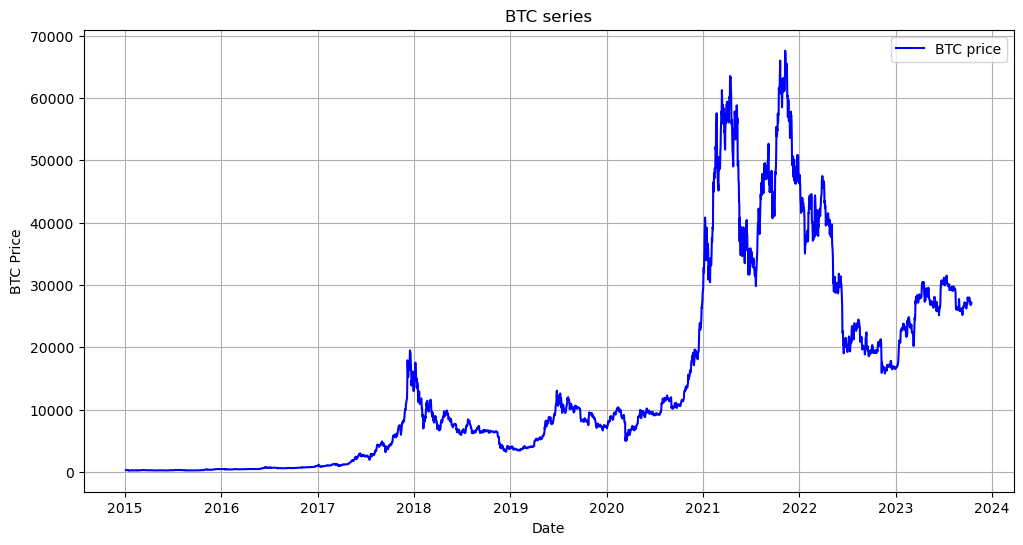

In [34]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_btc_sent.index, df_btc_sent['Close'], label='BTC price', color='blue')

# Customize the plot
plt.title('BTC series')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.grid(True)
plt.show()

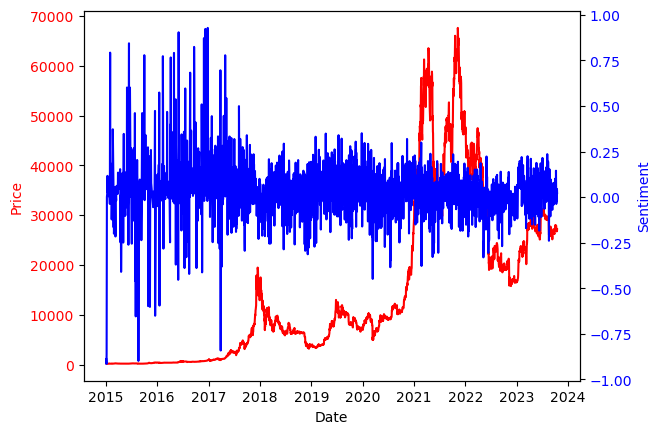

In [35]:

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
price= df_btc_sent['Close']
compound_sentiment = df_btc_sent['compound_sentiment']

dates = df_btc_sent.index  # Assuming the index of your DataFrame is the time series

# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, price, color='r', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='b', label='Compound Sentiment MA')

ax2.set_ylabel('Sentiment', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')


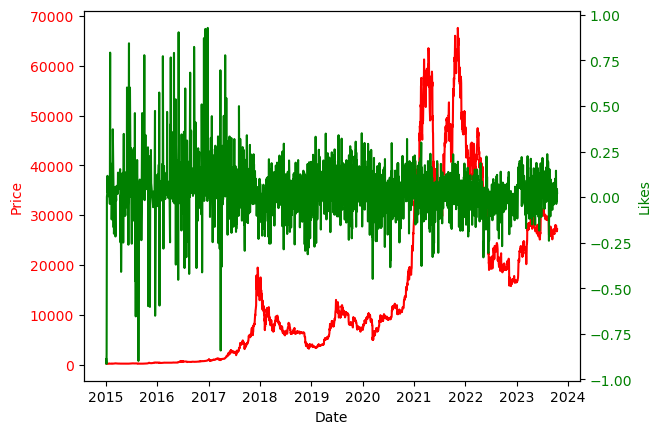

In [36]:

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
price= df_btc_sent['Close']
sentiment = df_btc_sent['Likes']

dates = df_btc_sent.index  # Assuming the index of your DataFrame is the time series

# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, price, color="red", label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='green', label='Likes')

ax2.set_ylabel('Likes', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.savefig('like_price.png', transparent=True)
# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')

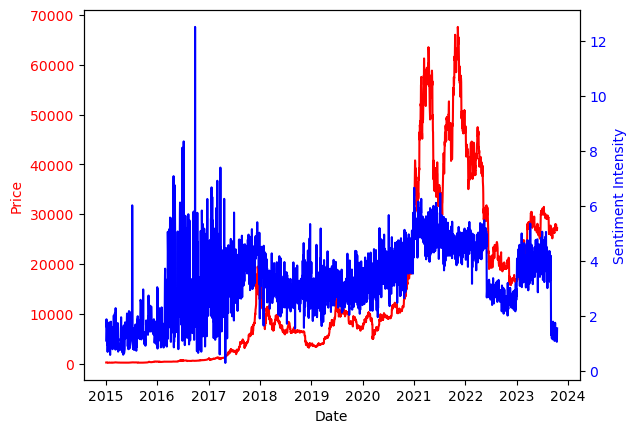

In [37]:

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
price= df_btc_sent['Close']
compound_sentiment = df_btc_sent['sentiment_intensity']

dates = df_btc_sent.index  # Assuming the index of your DataFrame is the time series

# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, price, color='r', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='b', label='Sentiment Intensity')

ax2.set_ylabel('Sentiment Intensity', color='b')
ax2.tick_params(axis='y', labelcolor='b')
plt.savefig('sent_price.png', transparent=True)
# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')


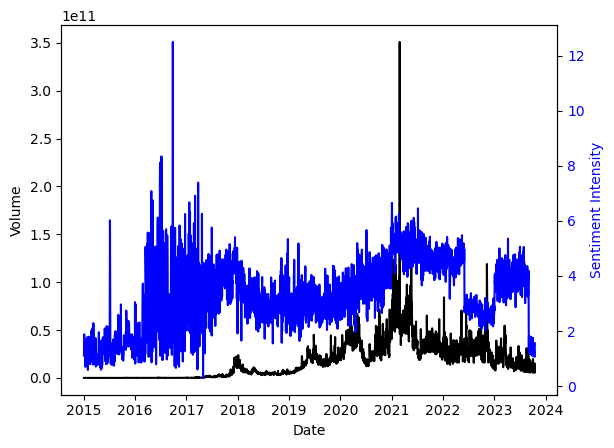

In [38]:

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
price= df_btc_sent['Volume']
compound_sentiment = df_btc_sent['sentiment_intensity']

dates = df_btc_sent.index  # Assuming the index of your DataFrame is the time series

# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, price, color='black', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='b', label='Sentiment Intensity')

ax2.set_ylabel('Sentiment Intensity', color='b')
ax2.tick_params(axis='y', labelcolor='b')
    # Save the plot with a transparent background
plt.savefig('sent_volume.png', transparent=True)
# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')

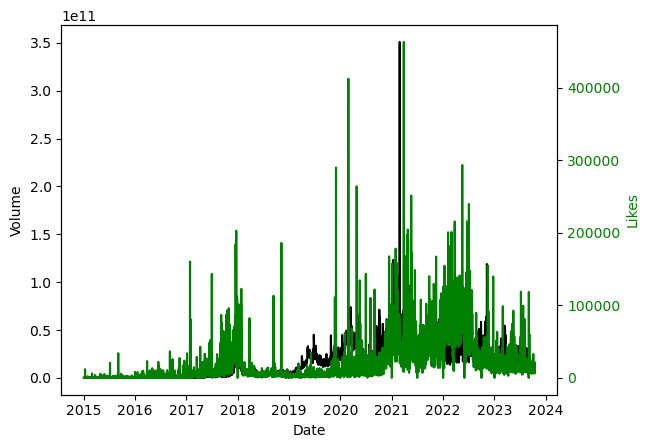

In [39]:

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
price= df_btc_sent['Volume']
compound_sentiment = df_btc_sent['Likes']

dates = df_btc_sent.index  # Assuming the index of your DataFrame is the time series

# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, price, color="black", label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='green', label='Likes')

ax2.set_ylabel('Likes', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.savefig('like_volume.png', transparent=True)
# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')